<a href="https://www.kaggle.com/code/tejashpathak/experiments-on-datasets-regression-analysis?scriptVersionId=130631174" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# Importing the libraries
import numpy as np
import pandas as pd
import statsmodels.api as sm
import seaborn as sns
sns.set_theme()
import matplotlib.pyplot as plt
from statsmodels.compat import lzip
import statsmodels.stats.api as sms
from statsmodels.stats.stattools import *
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
from sklearn.metrics import *

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


# Reading the data 

In [2]:
raw_data = pd.read_csv("/kaggle/input/data-science-salaries-2023/ds_salaries.csv")

In [3]:
raw_data.employee_residence

0       ES
1       US
2       US
3       CA
4       CA
        ..
3750    US
3751    US
3752    US
3753    US
3754    IN
Name: employee_residence, Length: 3755, dtype: object

# Information of the data

In [4]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3755 entries, 0 to 3754
Data columns (total 11 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   work_year           3755 non-null   int64 
 1   experience_level    3755 non-null   object
 2   employment_type     3755 non-null   object
 3   job_title           3755 non-null   object
 4   salary              3755 non-null   int64 
 5   salary_currency     3755 non-null   object
 6   salary_in_usd       3755 non-null   int64 
 7   employee_residence  3755 non-null   object
 8   remote_ratio        3755 non-null   int64 
 9   company_location    3755 non-null   object
 10  company_size        3755 non-null   object
dtypes: int64(4), object(7)
memory usage: 322.8+ KB


# Cleaning and Filtering the data

In [5]:

raw_data.job_title = raw_data.job_title.map({job: number for number, job in enumerate(raw_data.job_title.unique())})
raw_data.company_size = raw_data.company_size.map({size: number for number, size in enumerate(raw_data.company_size.unique())})
raw_data.salary_currency = raw_data.salary_currency.map({curr: number for number, curr in enumerate(raw_data.salary_currency.unique())})

## Exploratory Data Analysis :

*    Correlation plot for continious features (both dependent and independent)
*    Histogram for Continious feature
*    KDE plot between Y vs discrete Xs to undersand predictive power of each independent variable

/tmp/ipykernel_20/1882566049.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(raw_data.corr(), cmap="YlGnBu", annot = True, )


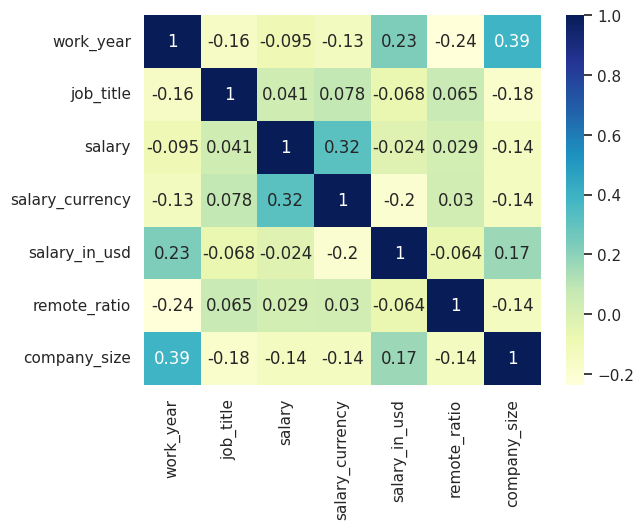

In [6]:

sns.heatmap(raw_data.corr(), cmap="YlGnBu", annot = True, )
plt.show()

In [7]:
raw_data.head()

,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,2023,SE,FT,0,80000,0,85847,ES,100,ES,0
1,2023,MI,CT,1,30000,1,30000,US,100,US,1
2,2023,MI,CT,1,25500,1,25500,US,100,US,1
3,2023,SE,FT,2,175000,1,175000,CA,100,CA,2
4,2023,SE,FT,2,120000,1,120000,CA,100,CA,2


In [8]:
import seaborn as sns

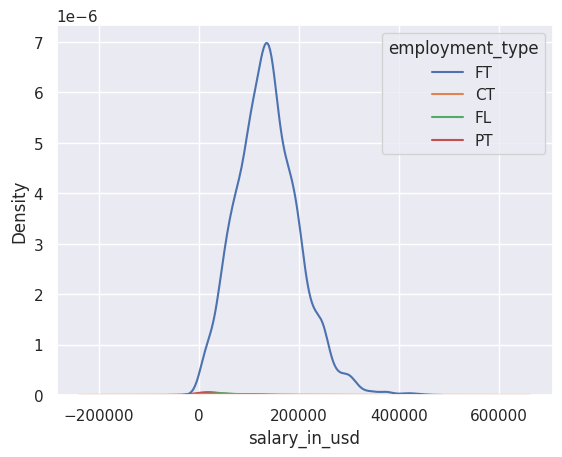

In [9]:
sns.kdeplot(data=raw_data, x='salary_in_usd', hue='employment_type')
plt.show()

<AxesSubplot: xlabel='salary_in_usd', ylabel='Density'>

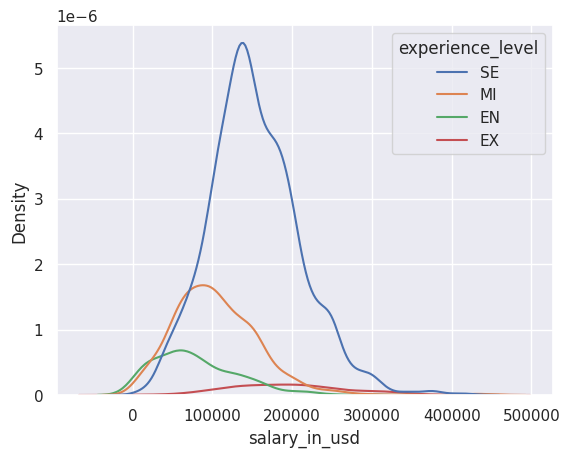

In [10]:
sns.kdeplot(data=raw_data, x="salary_in_usd", hue="experience_level")

/tmp/ipykernel_20/3507015647.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=raw_data, x="salary_in_usd", hue="employee_residence")
/tmp/ipykernel_20/3507015647.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=raw_data, x="salary_in_usd", hue="employee_residence")
/tmp/ipykernel_20/3507015647.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=raw_data, x="salary_in_usd", hue="employee_residence")
/tmp/ipykernel_20/3507015647.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(data=raw_data, x="salary_in_usd", hue="employee_residence")
/tmp/ipykernel_20/3507015647.py:1: UserWarning: Dataset has 0 variance; skipping density estimate. P

<AxesSubplot: xlabel='salary_in_usd', ylabel='Density'>

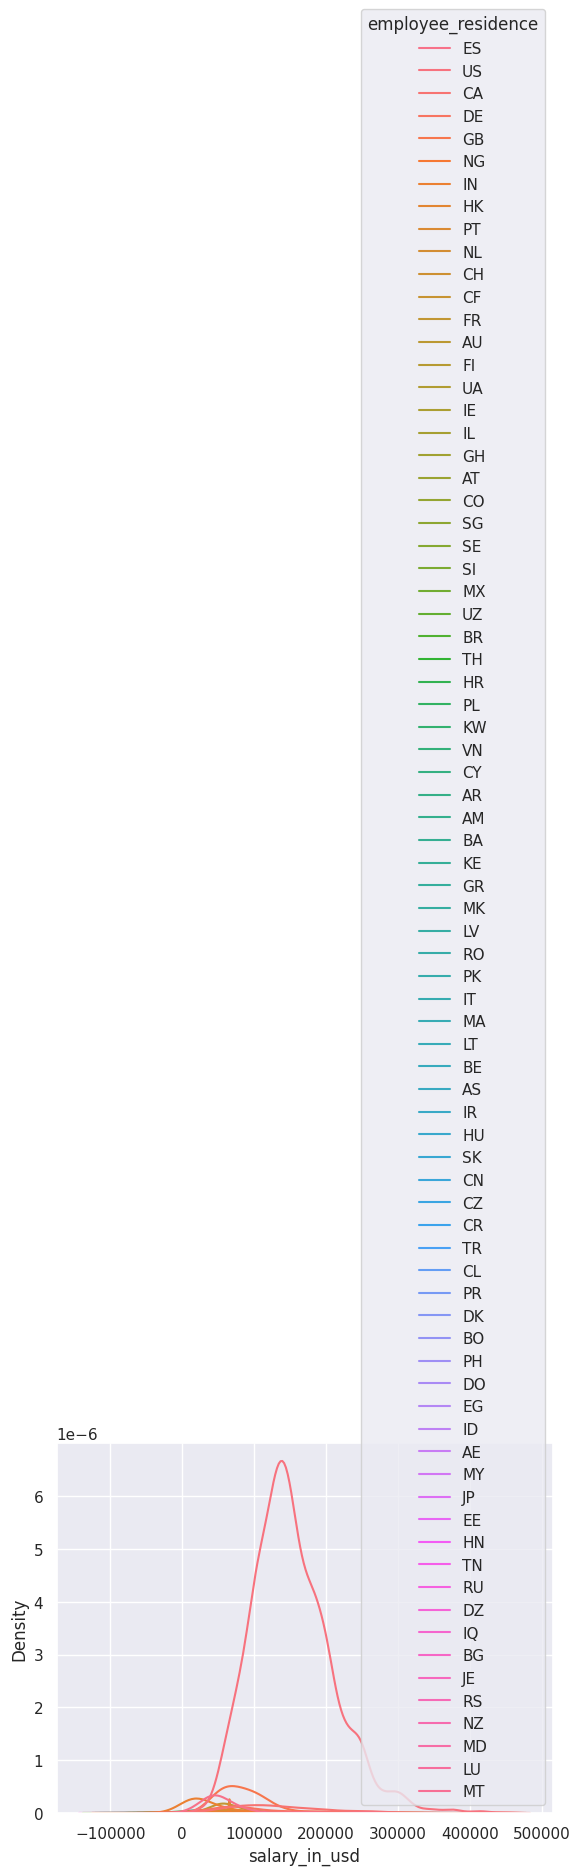

In [11]:
sns.kdeplot(data=raw_data, x="salary_in_usd", hue="employee_residence")

<AxesSubplot: xlabel='salary_in_usd', ylabel='Density'>

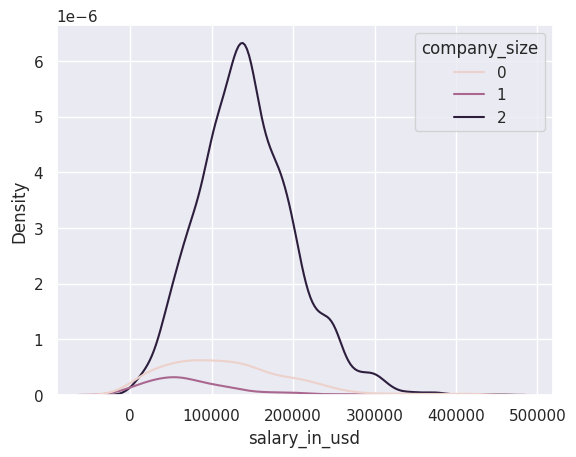

In [12]:
sns.kdeplot(data=raw_data, x="salary_in_usd", hue="company_size")

<AxesSubplot: xlabel='salary_in_usd', ylabel='Density'>

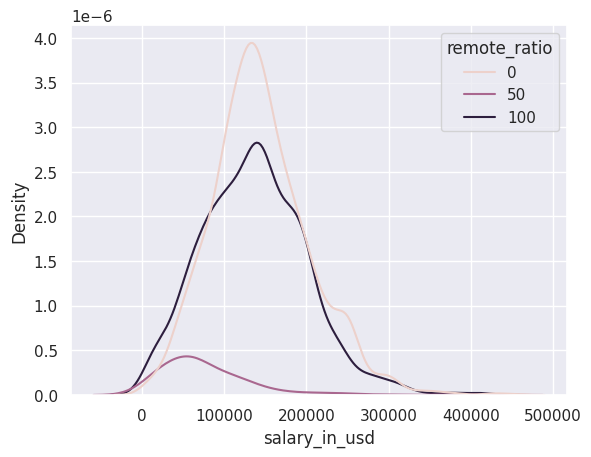

In [13]:
sns.kdeplot(data=raw_data, x="salary_in_usd", hue="remote_ratio")

<AxesSubplot: xlabel='remote_ratio', ylabel='salary_in_usd'>

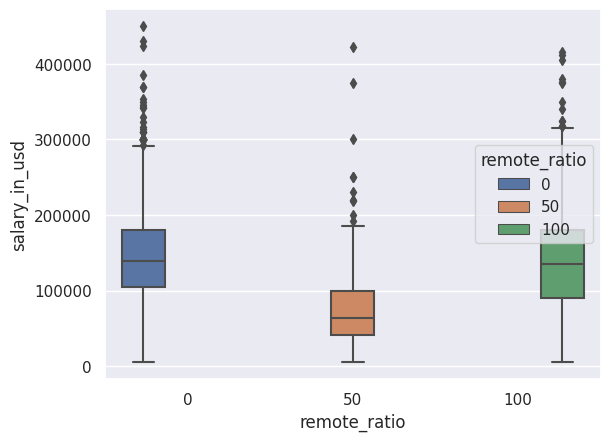

In [14]:
#sns.boxplot(data= raw_data,y= 'salary_in_usd',hue='remote_ratio')

# create grouped boxplot 
sns.boxplot(x = raw_data['remote_ratio'],
            y = raw_data['salary_in_usd'],
            hue = raw_data['remote_ratio'])
# sns.kdeplot(data=df, x='Variable1', y='Variable2', cmap='Blues', shade=True, shade_lowest=False)
# plt.show()


## Now let's model :

*    As I have learned only multiple regression - I am going to use the same for prediction
*    I would show a variation of optimization technique (OLS- 'Ordininary Least Squares' vs WLS- 'Weighted Least Squares')

In [15]:
one_hot_encoded = pd.get_dummies(raw_data, columns=['experience_level', 'employment_type', 'employee_residence', 'company_location'])

In [16]:
one_hot_encoded

,work_year,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,experience_level_EN,experience_level_EX,experience_level_MI,...,company_location_RU,company_location_SE,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,2023,0,80000,0,85847,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2023,1,30000,1,30000,100,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
2,2023,1,25500,1,25500,100,1,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3,2023,2,175000,1,175000,100,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2023,2,120000,1,120000,100,2,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,2020,2,412000,1,412000,100,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3751,2021,0,151000,1,151000,100,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3752,2020,2,105000,1,105000,100,1,1,0,0,...,0,0,0,0,0,0,0,0,1,0
3753,2020,20,100000,1,100000,100,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0


In [17]:
Y = one_hot_encoded.salary_in_usd
X = one_hot_encoded.drop(columns=['salary', 'salary_in_usd'])
X = sm.add_constant(X)
X

,const,work_year,job_title,salary_currency,remote_ratio,company_size,experience_level_EN,experience_level_EX,experience_level_MI,experience_level_SE,...,company_location_RU,company_location_SE,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN
0,1.0,2023,0,0,100,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,1.0,2023,1,1,100,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,1.0,2023,1,1,100,1,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3,1.0,2023,2,1,100,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
4,1.0,2023,2,1,100,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3750,1.0,2020,2,1,100,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
3751,1.0,2021,0,1,100,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
3752,1.0,2020,2,1,100,1,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3753,1.0,2020,20,1,100,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [18]:
Model = sm.OLS(Y, X).fit()

# Model P - value: significance of variables
### Acceptable range: 0.00 - 0.01
___
## Violated in remote_ratio, job_title

In [19]:
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.387
Model:                            OLS   Adj. R-squared:                  0.366
Method:                 Least Squares   F-statistic:                     17.91
Date:                Tue, 23 May 2023   Prob (F-statistic):          4.94e-294
Time:                        05:30:00   Log-Likelihood:                -45907.
No. Observations:                3755   AIC:                         9.207e+04
Df Residuals:                    3626   BIC:                         9.288e+04
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -7.825e+06   1.86e+06     -4.207      0.000   -1.15e+07   -4.18e+06
work_year              5952.8197   1404.638      4.238      0.000    3198.860    8706.780
job_title               177.0973     61.200      2.894      0.004      57.107     297.088
salary_currency       -4806.9685   1008.061     -4.769      0.000   -6783.391   -2830.546
remote_ratio            -12.7033     17.781     -0.714      0.475     -47.564      22.157
company_size          -6029.7934   1485.314     -4.060      0.000   -8941.928   -3117.659
experience_level_EN   -1.999e+06   4.65e+05     -4.299      0.000   -2.91e+06   -1.09e+06
experience_level_EX   -1.902e+06   4.65e+05     -4.091      0.000   -2.81e+06   -9.91e+05
experience_level_MI   -1.976e+06   4.65e+05     -4.251      0.000   -2.89e+06   -1.06e+06
experience_level_SE   -1.947e+06   4.65e+05     -4.188      0.000   -2.86e+06   -1.04e+06
employment_type_CT    -1.943e+06   4.65e+05     -4.179      0.000   -2.85e+06   -1.03e+06
employment_type_FL    -1.964e+06   4.65e+05     -4.220      0.000   -2.88e+06   -1.05e+06
employment_type_FT    -1.943e+06   4.65e+05     -4.177      0.000   -2.86e+06   -1.03e+06
employment_type_PT    -1.975e+06   4.65e+05     -4.246      0.000   -2.89e+06   -1.06e+06
employee_residence_AE -1.005e+05   2.86e+04     -3.511      0.000   -1.57e+05   -4.44e+04
employee_residence_AM -1.194e+05   3.58e+04     -3.336      0.001    -1.9e+05   -4.92e+04
employee_residence_AR -1.697e+05   4.08e+04     -4.160      0.000    -2.5e+05   -8.97e+04
employee_residence_AS -1.419e+05   6.59e+04     -2.155      0.031   -2.71e+05   -1.28e+04
employee_residence_AT -1.257e+05   4.78e+04     -2.631      0.009   -2.19e+05    -3.2e+04
employee_residence_AU -9.416e+04   3.68e+04     -2.556      0.011   -1.66e+05   -2.19e+04
employee_residence_BA -7.361e+04   3.59e+04     -2.053      0.040   -1.44e+05   -3322.876
employee_residence_BE -1.098e+05   5.97e+04     -1.838      0.066   -2.27e+05    7332.615
employee_residence_BG -1.336e+05   5.52e+04     -2.422      0.016   -2.42e+05   -2.54e+04
employee_residence_BO -1.217e+05   4.35e+04     -2.798      0.005   -2.07e+05   -3.64e+04
employee_residence_BR -1.015e+05    3.8e+04     -2.673      0.008   -1.76e+05    -2.7e+04
employee_residence_CA -5.019e+04   3.64e+04     -1.380      0.168   -1.22e+05    2.11e+04
employee_residence_CF -1.208e+05   3.12e+04     -3.870      0.000   -1.82e+05   -5.96e+04
employee_residence_CH -3.651e+04   6.26e+04     -0.584      0.560   -1.59e+05    8.62e+04
employee_residence_CL -7.402e+04   5.58e+04     -1.326      0.185   -1.84e+05    3.55e+04
employee_residence_CN -1.221e+04   5.74e+04     -0.213      0.832   -1.25e+05       1e+05
employee_residence_CO -1.174e+05   2.81e+04     -4.178      0.000   -1.72e+05   -6.23e+04
employee_residence_CR  

# Durbin - Watson : Auto-correlation
### Acceptable range: 1.5 - 2.5
___
## Not Violated

In [20]:
durbin_watson(Model.resid)

1.9736180008691586

# VIF: Multicollinearity
### Acceptable ranges: 0.75 - 2
___
## Violated in company_location

In [21]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
# import the inflation factor
for i in range(len(X.columns)):
  # run through the indexes
  if variance_inflation_factor(X.values, i) != np.inf:
    print(X.columns[i], ":", variance_inflation_factor(X.values, i))
  else:
    # if it is an inf print the column name
    print(X.columns[i])

/opt/conda/lib/python3.10/site-packages/statsmodels/regression/linear_model.py:1752: RuntimeWarning: divide by zero encountered in double_scalars
  return 1 - self.ssr/self.centered_tss


const : 0.0
work_year : 1.4042660732766674
job_title : 1.2138090048136199
salary_currency : 3.5962065722161554
remote_ratio : 1.1111342076910378
company_size : 1.4584313041672827
experience_level_EN


/opt/conda/lib/python3.10/site-packages/statsmodels/stats/outliers_influence.py:195: RuntimeWarning: divide by zero encountered in double_scalars
  vif = 1. / (1. - r_squared_i)


experience_level_EX
experience_level_MI
experience_level_SE
employment_type_CT
employment_type_FL
employment_type_FT
employment_type_PT
employee_residence_AE
employee_residence_AM
employee_residence_AR
employee_residence_AS
employee_residence_AT
employee_residence_AU
employee_residence_BA
employee_residence_BE
employee_residence_BG
employee_residence_BO
employee_residence_BR
employee_residence_CA
employee_residence_CF
employee_residence_CH
employee_residence_CL
employee_residence_CN
employee_residence_CO
employee_residence_CR
employee_residence_CY
employee_residence_CZ
employee_residence_DE
employee_residence_DK
employee_residence_DO
employee_residence_DZ
employee_residence_EE
employee_residence_EG
employee_residence_ES
employee_residence_FI
employee_residence_FR
employee_residence_GB
employee_residence_GH
employee_residence_GR
employee_residence_HK
employee_residence_HN
employee_residence_HR
employee_residence_HU
employee_residence_ID
employee_residence_IE
employee_residence_IL
employ

# Breusch-Pagan: Heteroskedatasticity
### Acceptable p-value: > 0.05
___
## Failed: Heteroskedasticity is assumed

In [22]:

test_result = sms.het_breuschpagan(Model.resid, Model.model.exog)
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
for i in range(len(test_result)):
  print(names[i],": ", test_result[i])

Lagrange multiplier statistic :  111.77876205647117
p-value :  0.9992278044579779
f-value :  0.8691436882565898
f p-value :  0.8506071742258651


## Evenworse p-value for log of y

In [23]:
Model_semi_log_Y = sm.OLS(np.log(Y), X).fit()
test_result = sms.het_breuschpagan(Model_semi_log_Y.resid, Model_semi_log_Y.model.exog)
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
for i in range(len(test_result)):
  print(names[i],": ", test_result[i])

Lagrange multiplier statistic :  334.5445725312506
p-value :  6.494011852599867e-14
f-value :  2.77068965513465
f p-value :  1.0330761678914133e-21


In [24]:
# X.salary = np.log(X.salary)
# X.work_year = np.log(X.work_year)

# Very Bad p-value

In [25]:
Model_semi_log_X = sm.OLS(Y, X).fit()
test_result = sms.het_breuschpagan(Model_semi_log_X.resid, Model_semi_log_X.model.exog)
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
for i in range(len(test_result)):
  print(names[i],": ", test_result[i])

Lagrange multiplier statistic :  111.77876205647117
p-value :  0.9992278044579779
f-value :  0.8691436882565898
f p-value :  0.8506071742258651


# Very Bad p-value

In [26]:
Model_log_log = sm.OLS(np.log(Y), X).fit()
test_result = sms.het_breuschpagan(Model_log_log.resid, Model_log_log.model.exog)
names = ['Lagrange multiplier statistic', 'p-value',
         'f-value', 'f p-value']
for i in range(len(test_result)):
  print(names[i],": ", test_result[i])

Lagrange multiplier statistic :  334.5445725312506
p-value :  6.494011852599867e-14
f-value :  2.77068965513465
f p-value :  1.0330761678914133e-21


# WLS model, better predictive power

In [27]:
wt = 1 / smf.ols('Model.resid.abs() ~ Model.fittedvalues', data=raw_data).fit().fittedvalues**2
fit_wls = sm.WLS(Y, X, weights=wt).fit()

#view summary of weighted least squares regression model
print(fit_wls.summary())
y_pred = fit_wls.predict()

                            WLS Regression Results                            
Dep. Variable:          salary_in_usd   R-squared:                       0.633
Model:                            WLS   Adj. R-squared:                  0.620
Method:                 Least Squares   F-statistic:                     48.92
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        05:30:20   Log-Likelihood:                -45821.
No. Observations:                3755   AIC:                         9.190e+04
Df Residuals:                    3626   BIC:                         9.270e+04
Df Model:                         128                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -6.223e+

In [28]:
# Split the data into input features (X) and target variable (y)
X = one_hot_encoded.drop('salary_in_usd', axis=1)
y = raw_data['salary_in_usd']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# SKlearn OLS

In [29]:
# Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X_train, y_train)
y_pred = model.predict(X)


In [30]:
# Calculate mean squared error
mse = mean_squared_error(Y, y_pred)

# Calculate R-squared score
r2 = r2_score(Y, y_pred)

# Print evaluation metrics
print("Mean Squared Error:", mse)
print("R-squared:", r2)

Mean Squared Error: 2379381705.143697
R-squared: 0.40140633299284656


# Train test split ($\beta$ stability) OLS

In [31]:
X_train_1, X_test_1, y_train_1, y_test_1 = train_test_split(X
  , Y, test_size=0.2, random_state=42
)
X_train_2, X_test_2, y_train_2, y_test_2 = train_test_split(X
  , Y, test_size=0.25, random_state=36
)
X_train_3, X_test_3, y_train_3, y_test_3 = train_test_split(X
  , Y, test_size=0.3, random_state=24
)

M1_train = sm.OLS(y_train_1, X_train_1).fit()
M2_train = sm.OLS(y_train_2, X_train_2).fit()
M3_train = sm.OLS(y_train_3, X_train_3).fit()
M1_test = sm.OLS(y_test_1, X_test_1).fit()
M2_test = sm.OLS(y_test_2, X_test_2).fit()
M3_test = sm.OLS(y_test_3, X_test_3).fit()
MAPE1_train = mean_absolute_percentage_error(y_train_1, M1_train.predict(X_train_1))
MAPE2_train = mean_absolute_percentage_error(y_train_2, M2_train.predict(X_train_2))
MAPE3_train = mean_absolute_percentage_error(y_train_3, M3_train.predict(X_train_3))
MAPE1_test = mean_absolute_percentage_error(y_test_1, M1_test.predict(X_test_1))
MAPE2_test = mean_absolute_percentage_error(y_test_2, M2_test.predict(X_test_2))
MAPE3_test = mean_absolute_percentage_error(y_test_3, M3_test.predict(X_test_3))
MSE1_train = mean_squared_error(y_train_1, M1_train.predict(X_train_1))
MSE2_train = mean_squared_error(y_train_2, M2_train.predict(X_train_2))
MSE3_train = mean_squared_error(y_train_3, M3_train.predict(X_train_3))
MSE1_test = mean_squared_error(y_test_1, M1_test.predict(X_test_1))
MSE2_test = mean_squared_error(y_test_2, M2_test.predict(X_test_2))
MSE3_test = mean_squared_error(y_test_3, M3_test.predict(X_test_3))
MAE1_train = mean_absolute_error(y_train_1, M1_train.predict(X_train_1))
MAE2_train = mean_absolute_error(y_train_2, M2_train.predict(X_train_2))
MAE3_train = mean_absolute_error(y_train_3, M3_train.predict(X_train_3))
MAE1_test = mean_absolute_error(y_test_1, M1_test.predict(X_test_1))
MAE2_test = mean_absolute_error(y_test_2, M2_test.predict(X_test_2))
MAE3_test = mean_absolute_error(y_test_3, M3_test.predict(X_test_3))

RMSE1_train = mean_squared_error(y_train_1, M1_train.predict(X_train_1), squared=False)
RMSE2_train = mean_squared_error(y_train_2, M2_train.predict(X_train_2), squared=False)
RMSE3_train = mean_squared_error(y_train_3, M3_train.predict(X_train_3), squared=False)

RMSE1_test = mean_squared_error(y_test_1, M1_test.predict(X_test_1), squared=False)
RMSE2_test = mean_squared_error(y_test_2, M2_test.predict(X_test_2), squared=False)
RMSE3_test = mean_squared_error(y_test_3, M3_test.predict(X_test_3), squared=False)


In [32]:
beta_stability_test_OLS = pd.DataFrame(
          {
      "OLS Matrices": ['M1', 'M2', 'M3',],
      "OLS MAPE for train": [MAPE1_train, MAPE2_train, MAPE3_train, ],
      "OLS MSE for train": [MSE1_train, MSE2_train, MSE3_train, ],
      "OLS MAE for train": [MAE1_train, MAE2_train, MAE3_train, ],
      "OLS RMSE for train": [RMSE1_train, RMSE2_train, RMSE3_train, ],
      "OLS MAPE for test": [MAPE1_test, MAPE2_test, MAPE3_test, ],
      "OLS MSE for test": [MSE1_test, MSE2_test, MSE3_test, ],
      "OLS MAE for test": [MAE1_test, MAE2_test, MAE3_test, ],
      "OLS RMSE for test": [RMSE1_test, RMSE2_test, RMSE3_test, ]  
  }
)

In [33]:
beta_stability_test_OLS

,OLS Matrices,OLS MAPE for train,OLS MSE for train,OLS MAE for train,OLS RMSE for train,OLS MAPE for test,OLS MSE for test,OLS MAE for test,OLS RMSE for test
0,M1,0.347927,2.350125e+09,36237.906617,48478.084917,0.336409,2.169302e+09,35269.422719,46575.770717
1,M2,0.344976,2.420173e+09,36679.046573,49195.253509,0.344734,2.026883e+09,33873.100796,45020.917287
2,M3,0.340579,2.337149e+09,36162.518568,48344.068094,0.370030,2.206500e+09,35006.245668,46973.400273


# Train test split ($\beta$ stability) WLS

In [34]:
X_train_1, X_test_1, y_train_1, y_test_1, X_weights_train1, X_weights_test1 = train_test_split(X
  , Y, wt, test_size=0.2, random_state=42
)
X_train_2, X_test_2, y_train_2, y_test_2, X_weights_train2, X_weights_test2 = train_test_split(X
  , Y, wt, test_size=0.25, random_state=36
)
X_train_3, X_test_3, y_train_3, y_test_3, X_weights_train3, X_weights_test3 = train_test_split(X
  , Y, wt, test_size=0.3, random_state=24
)

M1_train = sm.WLS(y_train_1, X_train_1, weights=X_weights_train1).fit()
M2_train = sm.WLS(y_train_2, X_train_2, weights=X_weights_train2).fit()
M3_train = sm.WLS(y_train_3, X_train_3, weights=X_weights_train3).fit()
M1_test = sm.WLS(y_test_1, X_test_1, weights=X_weights_test1).fit()
M2_test = sm.WLS(y_test_2, X_test_2, weights=X_weights_test2).fit()
M3_test = sm.WLS(y_test_3, X_test_3, weights=X_weights_test3).fit()
MAPE1_train = mean_absolute_percentage_error(y_train_1, M1_train.predict())
MAPE2_train = mean_absolute_percentage_error(y_train_2, M2_train.predict())
MAPE3_train = mean_absolute_percentage_error(y_train_3, M3_train.predict())
MAPE1_test = mean_absolute_percentage_error(y_test_1, M1_test.predict())
MAPE2_test = mean_absolute_percentage_error(y_test_2, M2_test.predict())
MAPE3_test = mean_absolute_percentage_error(y_test_3, M3_test.predict())
MSE1_train = mean_squared_error(y_train_1, M1_train.predict())
MSE2_train = mean_squared_error(y_train_2, M2_train.predict())
MSE3_train = mean_squared_error(y_train_3, M3_train.predict())
MSE1_test = mean_squared_error(y_test_1, M1_test.predict())
MSE2_test = mean_squared_error(y_test_2, M2_test.predict())
MSE3_test = mean_squared_error(y_test_3, M3_test.predict())
MAE1_train = mean_absolute_error(y_train_1, M1_train.predict())
MAE2_train = mean_absolute_error(y_train_2, M2_train.predict())
MAE3_train = mean_absolute_error(y_train_3, M3_train.predict())
MAE1_test = mean_absolute_error(y_test_1, M1_test.predict())
MAE2_test = mean_absolute_error(y_test_2, M2_test.predict())
MAE3_test = mean_absolute_error(y_test_3, M3_test.predict())

RMSE1_train = mean_squared_error(y_train_1, M1_train.predict(), squared=False)
RMSE2_train = mean_squared_error(y_train_2, M2_train.predict(), squared=False)
RMSE3_train = mean_squared_error(y_train_3, M3_train.predict(), squared=False)

RMSE1_test = mean_squared_error(y_test_1, M1_test.predict(), squared=False)
RMSE2_test = mean_squared_error(y_test_2, M2_test.predict(), squared=False)
RMSE3_test = mean_squared_error(y_test_3, M3_test.predict(), squared=False)

In [35]:
beta_stability_test_WLS = pd.DataFrame(
          {
      "WLS Matrices": ['M1', 'M2', 'M3',],
      "WLS MAPE for train": [MAPE1_train, MAPE2_train, MAPE3_train, ],
      "WLS MSE for train": [MSE1_train, MSE2_train, MSE3_train, ],
      "WLS MAE for train": [MAE1_train, MAE2_train, MAE3_train, ],
      "WLS RMSE for train": [RMSE1_train, RMSE2_train, RMSE3_train, ],
      "WLS MAPE for test": [MAPE1_test, MAPE2_test, MAPE3_test, ],
      "WLS MSE for test": [MSE1_test, MSE2_test, MSE3_test, ],
      "WLS MAE for test": [MAE1_test, MAE2_test, MAE3_test, ],
      "WLS RMSE for test": [RMSE1_test, RMSE2_test, RMSE3_test, ]  
  }
)
beta_stability_test_WLS

,WLS Matrices,WLS MAPE for train,WLS MSE for train,WLS MAE for train,WLS RMSE for train,WLS MAPE for test,WLS MSE for test,WLS MAE for test,WLS RMSE for test
0,M1,0.326812,2.409078e+09,36634.554228,49082.361098,0.295415,2.212313e+09,35344.147539,47035.230133
1,M2,0.326914,2.472227e+09,36986.966690,49721.489783,0.299822,2.102882e+09,34426.745691,45857.194388
2,M3,0.322941,2.380700e+09,36426.067988,48792.412958,0.322669,2.340218e+09,36368.993795,48375.801273


### next imnprovement - Outlier treatment 

*    IQR Based 
*    Percentile based
*    3 Sigma limit
*    Isolation forest etc

### We shall try 

*    removing outliers
*    capping outliers 

## Percentile Based

In [36]:
quart = one_hot_encoded.quantile([0.01, 0.99])
Min = quart.iloc[[0]]
Max = quart.iloc[[1]]


In [37]:
outliers = one_hot_encoded[(one_hot_encoded.salary>float(Max.salary)) | (one_hot_encoded.salary<float(Min.salary)) | (one_hot_encoded.salary_in_usd>float(Max.salary_in_usd)) | (one_hot_encoded.salary_in_usd<float(Min.salary_in_usd))]

In [38]:
one_hot_encoded = pd.merge(one_hot_encoded, outliers, on=one_hot_encoded.columns.to_list(), how='left', indicator='outlier')

one_hot_encoded['outlier'] = np.where(one_hot_encoded.outlier == 'both', True, False)

In [39]:
one_hot_encoded

,work_year,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,experience_level_EN,experience_level_EX,experience_level_MI,...,company_location_SE,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,outlier
0,2023,0,80000,0,85847,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,2023,1,30000,1,30000,100,1,0,0,1,...,0,0,0,0,0,0,0,1,0,False
2,2023,1,25500,1,25500,100,1,0,0,1,...,0,0,0,0,0,0,0,1,0,False
3,2023,2,175000,1,175000,100,2,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,2023,2,120000,1,120000,100,2,0,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3766,2020,2,412000,1,412000,100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,True
3767,2021,0,151000,1,151000,100,0,0,0,1,...,0,0,0,0,0,0,0,1,0,False
3768,2020,2,105000,1,105000,100,1,1,0,0,...,0,0,0,0,0,0,0,1,0,False
3769,2020,20,100000,1,100000,100,0,1,0,0,...,0,0,0,0,0,0,0,1,0,False


In [40]:
no_outliers_percentile = one_hot_encoded[one_hot_encoded.outlier == False]

In [41]:
no_outliers_percentile

,work_year,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,experience_level_EN,experience_level_EX,experience_level_MI,...,company_location_SE,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,outlier
0,2023,0,80000,0,85847,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,2023,1,30000,1,30000,100,1,0,0,1,...,0,0,0,0,0,0,0,1,0,False
2,2023,1,25500,1,25500,100,1,0,0,1,...,0,0,0,0,0,0,0,1,0,False
3,2023,2,175000,1,175000,100,2,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,2023,2,120000,1,120000,100,2,0,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3764,2021,11,24000,0,28369,50,0,0,0,1,...,0,0,0,0,0,0,0,0,0,False
3765,2021,30,165000,1,165000,100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,False
3767,2021,0,151000,1,151000,100,0,0,0,1,...,0,0,0,0,0,0,0,1,0,False
3768,2020,2,105000,1,105000,100,1,1,0,0,...,0,0,0,0,0,0,0,1,0,False


## IQR based

In [42]:
q1 = one_hot_encoded['salary_in_usd'].quantile(0.25)
q3 = one_hot_encoded['salary_in_usd'].quantile(0.75)
iqr = q3-q1 #Interquartile range
fence_low  = q1-1.5*iqr
fence_high = q3+1.5*iqr
no_outliers_iqr = one_hot_encoded.loc[(one_hot_encoded['salary_in_usd'] > fence_low) & (one_hot_encoded['salary_in_usd'] < fence_high)]

In [43]:
no_outliers_iqr

,work_year,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,experience_level_EN,experience_level_EX,experience_level_MI,...,company_location_SE,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,outlier
0,2023,0,80000,0,85847,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,2023,1,30000,1,30000,100,1,0,0,1,...,0,0,0,0,0,0,0,1,0,False
2,2023,1,25500,1,25500,100,1,0,0,1,...,0,0,0,0,0,0,0,1,0,False
3,2023,2,175000,1,175000,100,2,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,2023,2,120000,1,120000,100,2,0,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,2021,30,165000,1,165000,100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,False
3767,2021,0,151000,1,151000,100,0,0,0,1,...,0,0,0,0,0,0,0,1,0,False
3768,2020,2,105000,1,105000,100,1,1,0,0,...,0,0,0,0,0,0,0,1,0,False
3769,2020,20,100000,1,100000,100,0,1,0,0,...,0,0,0,0,0,0,0,1,0,False


## 3 * $\sigma$ based

In [44]:
data_mean, data_std = np.mean(one_hot_encoded['salary_in_usd']), np.std(one_hot_encoded['salary_in_usd'])
# identify outliers
cut_off = data_std * 3
lower, upper = data_mean - cut_off, data_mean + cut_off
no_outliers_3sigma = one_hot_encoded.loc[(one_hot_encoded['salary_in_usd'] > lower) & (one_hot_encoded['salary_in_usd'] < upper)]

In [45]:
no_outliers_3sigma

,work_year,job_title,salary,salary_currency,salary_in_usd,remote_ratio,company_size,experience_level_EN,experience_level_EX,experience_level_MI,...,company_location_SE,company_location_SG,company_location_SI,company_location_SK,company_location_TH,company_location_TR,company_location_UA,company_location_US,company_location_VN,outlier
0,2023,0,80000,0,85847,100,0,0,0,0,...,0,0,0,0,0,0,0,0,0,False
1,2023,1,30000,1,30000,100,1,0,0,1,...,0,0,0,0,0,0,0,1,0,False
2,2023,1,25500,1,25500,100,1,0,0,1,...,0,0,0,0,0,0,0,1,0,False
3,2023,2,175000,1,175000,100,2,0,0,0,...,0,0,0,0,0,0,0,0,0,False
4,2023,2,120000,1,120000,100,2,0,0,0,...,0,0,0,0,0,0,0,0,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3765,2021,30,165000,1,165000,100,0,0,0,0,...,0,0,0,0,0,0,0,1,0,False
3767,2021,0,151000,1,151000,100,0,0,0,1,...,0,0,0,0,0,0,0,1,0,False
3768,2020,2,105000,1,105000,100,1,1,0,0,...,0,0,0,0,0,0,0,1,0,False
3769,2020,20,100000,1,100000,100,0,1,0,0,...,0,0,0,0,0,0,0,1,0,False


# Running the models for the removed outliers in OLS

# Using IQR seems to be the best option as it is giving the higher $R^2$ and $R^2_{adj.}$

In [46]:
# Split the data into input features (X) and target variable (y) .drop(['salary_in_usd', 'outlier', 'salary'], axis=1, inplace=True)
y = no_outliers_percentile['salary_in_usd']
X = no_outliers_percentile.drop(columns=['salary_in_usd', 'outlier', 'salary'])


 # Create a Linear Regression model
model = LinearRegression()

# Fit the model to the training data
model.fit(X, y)
y_pred = model.predict(X)
model.score(X, y)

0.35434447595998997

In [47]:
Y = no_outliers_percentile.salary_in_usd
X = no_outliers_percentile.drop(columns=['salary', 'salary_in_usd', 'outlier'])
X = sm.add_constant(X)
X
Model = sm.OLS(Y, X).fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.354
Model:                            OLS   Adj. R-squared:                  0.334
Method:                 Least Squares   F-statistic:                     17.10
Date:                Tue, 23 May 2023   Prob (F-statistic):          1.42e-253
Time:                        05:30:25   Log-Likelihood:                -44188.
No. Observations:                3634   AIC:                         8.860e+04
Df Residuals:                    3520   BIC:                         8.931e+04
Df Model:                         113                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.829e+06    1.8e+06     -4.895      0.000   -1.24e+07   -5.29e+06
work_year              6721.5034   1365.607      4.922      0.000    4044.042    9398.965
job_title               136.0967     60.132      2.263      0.024      18.199     253.994
salary_currency       -4943.8657   1134.517     -4.358      0.000   -7168.242   -2719.489
remote_ratio            -14.0763     16.842     -0.836      0.403     -47.097      18.944
company_size          -4948.5536   1446.636     -3.421      0.001   -7784.883   -2112.224
experience_level_EN   -2.245e+06   4.51e+05     -4.980      0.000   -3.13e+06   -1.36e+06
experience_level_EX   -2.164e+06   4.51e+05     -4.797      0.000   -3.05e+06   -1.28e+06
experience_level_MI   -2.225e+06   4.51e+05     -4.934      0.000   -3.11e+06   -1.34e+06
experience_level_SE   -2.196e+06   4.51e+05     -4.869      0.000   -3.08e+06   -1.31e+06
employment_type_CT    -2.212e+06   4.51e+05     -4.905      0.000    -3.1e+06   -1.33e+06
employment_type_FL     -2.22e+06   4.51e+05     -4.925      0.000    -3.1e+06   -1.34e+06
employment_type_FT    -2.181e+06   4.51e+05     -4.834      0.000   -3.07e+06    -1.3e+06
employment_type_PT    -2.216e+06   4.52e+05     -4.900      0.000    -3.1e+06   -1.33e+06
employee_residence_AE -1.323e+05   3.05e+04     -4.336      0.000   -1.92e+05   -7.25e+04
employee_residence_AM -1.523e+05   3.66e+04     -4.156      0.000   -2.24e+05   -8.04e+04
employee_residence_AR -1.797e+05   4.17e+04     -4.310      0.000   -2.61e+05   -9.79e+04
employee_residence_AS -1.355e+05   6.36e+04     -2.129      0.033    -2.6e+05   -1.07e+04
employee_residence_AT -1.355e+05   4.59e+04     -2.952      0.003   -2.26e+05   -4.55e+04
employee_residence_AU -9.654e+04    3.8e+04     -2.543      0.011   -1.71e+05   -2.21e+04
employee_residence_BA  -1.07e+05   3.67e+04     -2.916      0.004   -1.79e+05   -3.51e+04
employee_residence_BE -1.099e+05   5.92e+04     -1.856      0.064   -2.26e+05    6224.417
employee_residence_BG -1.532e+05   5.26e+04     -2.912      0.004   -2.56e+05      -5e+04
employee_residence_BO -1.407e+05   4.23e+04     -3.331      0.001   -2.24e+05   -5.79e+04
employee_residence_BR -1.089e+05   4.15e+04     -2.625      0.009    -1.9e+05   -2.76e+04
employee_residence_CA -7.478e+04   3.66e+04     -2.046      0.041   -1.46e+05   -3109.549
employee_residence_CF -1.539e+05   3.29e+04     -4.683      0.000   -2.18e+05   -8.95e+04
employee_residence_CH -1.129e+05   3.06e+04     -3.696      0.000   -1.73e+05    -5.3e+04
employee_residence_CL -9.375e+04   5.35e+04     -1.751      0.080   -1.99e+05    1.12e+04
employee_residence_CN  -3.02e+04   5.61e+04     -0.538      0.590    -1.4e+05    7.98e+04
employee_residence_CO   -1.5e+05   3.01e+04     -4.978      0.000   -2.09e+05   -9.09e+04
employee_residence_CR  

In [48]:
Y = no_outliers_iqr.salary_in_usd
X = no_outliers_iqr.drop(columns=['salary', 'salary_in_usd', 'outlier'])
X = sm.add_constant(X)
X
Model = sm.OLS(Y, X).fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.417
Model:                            OLS   Adj. R-squared:                  0.396
Method:                 Least Squares   F-statistic:                     20.09
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        05:30:25   Log-Likelihood:                -44799.
No. Observations:                3696   AIC:                         8.985e+04
Df Residuals:                    3568   BIC:                         9.065e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                 -8.422e+06   1.69e+06     -4.973      0.000   -1.17e+07    -5.1e+06
work_year              6396.7288   1279.356      5.000      0.000    3888.386    8905.072
job_title               115.5737     55.749      2.073      0.038       6.271     224.876
salary_currency       -4495.5038    908.386     -4.949      0.000   -6276.512   -2714.496
remote_ratio             -4.1180     16.136     -0.255      0.799     -35.755      27.519
company_size          -4160.8051   1356.274     -3.068      0.002   -6819.955   -1501.655
experience_level_EN   -2.143e+06   4.23e+05     -5.062      0.000   -2.97e+06   -1.31e+06
experience_level_EX   -2.063e+06   4.24e+05     -4.872      0.000   -2.89e+06   -1.23e+06
experience_level_MI   -2.122e+06   4.23e+05     -5.012      0.000   -2.95e+06   -1.29e+06
experience_level_SE   -2.094e+06   4.23e+05     -4.945      0.000   -2.92e+06   -1.26e+06
employment_type_CT    -2.114e+06   4.24e+05     -4.990      0.000   -2.94e+06   -1.28e+06
employment_type_FL    -2.106e+06   4.24e+05     -4.970      0.000   -2.94e+06   -1.28e+06
employment_type_FT    -2.086e+06   4.24e+05     -4.924      0.000   -2.92e+06   -1.26e+06
employment_type_PT    -2.116e+06   4.24e+05     -4.997      0.000   -2.95e+06   -1.29e+06
employee_residence_AE -1.065e+05   2.61e+04     -4.074      0.000   -1.58e+05   -5.52e+04
employee_residence_AM -1.263e+05   3.25e+04     -3.884      0.000    -1.9e+05   -6.26e+04
employee_residence_AR -1.727e+05   3.71e+04     -4.655      0.000   -2.46e+05      -1e+05
employee_residence_AS -1.398e+05   5.95e+04     -2.348      0.019   -2.57e+05   -2.31e+04
employee_residence_AT -1.256e+05   4.33e+04     -2.899      0.004   -2.11e+05   -4.07e+04
employee_residence_AU -9.801e+04   3.35e+04     -2.922      0.004   -1.64e+05   -3.22e+04
employee_residence_BA -8.116e+04   3.26e+04     -2.490      0.013   -1.45e+05   -1.73e+04
employee_residence_BE -1.123e+05    5.4e+04     -2.077      0.038   -2.18e+05   -6312.794
employee_residence_BG -1.369e+05   4.99e+04     -2.741      0.006   -2.35e+05    -3.9e+04
employee_residence_BO -1.243e+05   3.95e+04     -3.145      0.002   -2.02e+05   -4.68e+04
employee_residence_BR -1.045e+05   3.46e+04     -3.023      0.003   -1.72e+05   -3.67e+04
employee_residence_CA -6.163e+04   3.32e+04     -1.858      0.063   -1.27e+05    3391.128
employee_residence_CF -1.294e+05   2.85e+04     -4.548      0.000   -1.85e+05   -7.36e+04
employee_residence_CH -3.846e+04   5.66e+04     -0.679      0.497    -1.5e+05    7.26e+04
employee_residence_CL -7.642e+04   5.06e+04     -1.511      0.131   -1.76e+05    2.27e+04
employee_residence_CN -1.871e+04   5.19e+04     -0.360      0.719   -1.21e+05    8.31e+04
employee_residence_CO -1.241e+05   2.57e+04     -4.835      0.000   -1.74e+05   -7.38e+04
employee_residence_CR -

In [49]:
Y = no_outliers_3sigma.salary_in_usd
X = no_outliers_3sigma.drop(columns=['salary', 'salary_in_usd', 'outlier'])
X = sm.add_constant(X)
X
Model = sm.OLS(Y, X).fit()
Model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:          salary_in_usd   R-squared:                       0.414
Model:                            OLS   Adj. R-squared:                  0.393
Method:                 Least Squares   F-statistic:                     20.12
Date:                Tue, 23 May 2023   Prob (F-statistic):               0.00
Time:                        05:30:26   Log-Likelihood:                -45664.
No. Observations:                3750   AIC:                         9.158e+04
Df Residuals:                    3622   BIC:                         9.238e+04
Df Model:                         127                                         
Covariance Type:            nonrobust                                         
=========================================================================================
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                  -9.77e+06   1.78e+06     -5.493      0.000   -1.33e+07   -6.28e+06
work_year              7417.9304   1343.578      5.521      0.000    4783.686    1.01e+04
job_title               119.0248     58.752      2.026      0.043       3.835     234.215
salary_currency       -4667.6553    960.274     -4.861      0.000   -6550.386   -2784.924
remote_ratio              4.7728     16.923      0.282      0.778     -28.406      37.952
company_size          -4342.8733   1427.103     -3.043      0.002   -7140.880   -1544.867
experience_level_EN   -2.486e+06   4.45e+05     -5.592      0.000   -3.36e+06   -1.61e+06
experience_level_EX   -2.381e+06   4.45e+05     -5.354      0.000   -3.25e+06   -1.51e+06
experience_level_MI   -2.466e+06   4.45e+05     -5.546      0.000   -3.34e+06   -1.59e+06
experience_level_SE   -2.437e+06   4.45e+05     -5.479      0.000   -3.31e+06   -1.56e+06
employment_type_CT    -2.451e+06   4.45e+05     -5.511      0.000   -3.32e+06   -1.58e+06
employment_type_FL    -2.441e+06   4.45e+05     -5.485      0.000   -3.31e+06   -1.57e+06
employment_type_FT    -2.423e+06   4.45e+05     -5.446      0.000    -3.3e+06   -1.55e+06
employment_type_PT    -2.455e+06   4.45e+05     -5.518      0.000   -3.33e+06   -1.58e+06
employee_residence_AE -1.245e+05   2.75e+04     -4.528      0.000   -1.78e+05   -7.06e+04
employee_residence_AM -1.446e+05   3.43e+04     -4.218      0.000   -2.12e+05   -7.74e+04
employee_residence_AR  -1.91e+05   3.91e+04     -4.880      0.000   -2.68e+05   -1.14e+05
employee_residence_AS -1.573e+05   6.29e+04     -2.499      0.012   -2.81e+05   -3.39e+04
employee_residence_AT -1.458e+05   4.57e+04     -3.188      0.001   -2.35e+05   -5.61e+04
employee_residence_AU -1.164e+05   3.54e+04     -3.290      0.001   -1.86e+05    -4.7e+04
employee_residence_BA -9.992e+04   3.43e+04     -2.910      0.004   -1.67e+05   -3.26e+04
employee_residence_BE -1.321e+05   5.71e+04     -2.314      0.021   -2.44e+05   -2.02e+04
employee_residence_BG -1.539e+05   5.27e+04     -2.917      0.004   -2.57e+05   -5.04e+04
employee_residence_BO -1.414e+05   4.17e+04     -3.392      0.001   -2.23e+05   -5.97e+04
employee_residence_BR -1.214e+05   3.64e+04     -3.331      0.001   -1.93e+05   -4.99e+04
employee_residence_CA -7.734e+04    3.5e+04     -2.213      0.027   -1.46e+05   -8806.398
employee_residence_CF -1.481e+05      3e+04     -4.946      0.000   -2.07e+05   -8.94e+04
employee_residence_CH  -5.84e+04   5.98e+04     -0.976      0.329   -1.76e+05    5.89e+04
employee_residence_CL -9.432e+04   5.34e+04     -1.766      0.077   -1.99e+05    1.04e+04
employee_residence_CN -3.493e+04   5.48e+04     -0.637      0.524   -1.42e+05    7.26e+04
employee_residence_CO -1.425e+05    2.7e+04     -5.280      0.000   -1.95e+05   -8.96e+04
employee_residence_CR -